<a href="https://colab.research.google.com/github/LuisOtilioZuniga/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Entrega_Final_del_Proyecto_de_An%C3%A1lisis_Exploratorio_de_los_Datos%2C_263349_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance del Proyecto**

**MANUFACTURING DEFECTS DATASET: SECOM DATASET**

**Etapas: Métricas de Calidad de los Datos, Análisis Descriptivo,  Preprocesamiento, Análisis exploratorio de los datos (EDA)**

Nombre: Luis Otilio Zuñiga Próspero

Matrícula: 263349

Fecha 10/10/2025

# **1) Introducción**

**- Descripción breve del problema que se pretende abordar.**

El sector Manufacturero esta en una constante competencia por incrementar la eficiencia en los procesos productivos, ya que esto coloca a la empresa en una mejor posicion al compararse con su competencia. Para el sector Manufacturero de Semiconductores no es una exepción. El proceso de producción para productos utilizados en la industría de los semiconductores es un proceso con alta automatización, gran parte del proceso es realizada por maquinas que requieren muy poca intervención humana. Por lo mismo hay una gran cantidad de mediciones y/o inspecciones que se toman de manera automatizada para rechazar/retrabajar/aceptar un material/sub-ensamble/producto.


Toda compañia manufacturera debe comprender que variables son las que mas influencia tienen en la generación de defectos. La correcta manipulacion de estas variables impulsaran a una mayor eficiencia en el proceso productivo. El proyecto busca resolver una situacion muy comun, en procesos productivos con grandes cantidades de mediciones debido a su naturaleza y automatizacion. Muchas de estas mediciones pueden ser irrelevantes o con ruido, esto dificulta encontrar las verdaderas causas de los defectos. Mejorar la eficiencia en un proceso donde existe un alto grado de automatización requiere de la correcta identificacion de las variables que impactan a la generacion de errores/defectos.

**- Objetivo general del proyecto y objetivos específicos.**

GENERAL: Analizar el dataset SECOM aplicando técnicas de selección de características para identificar las variables de manufactura más relevantes que influyen en la ocurrencia de defectos, con el fin de mejorar el monitoreo del proceso, reducir fallas y aumentar la eficiencia productiva.


ESPECÍFICOS: Explorar y depurar los datos del SECOM para garantizar su calidad; realizar un análisis descriptivo que permita comprender la relación entre variables y defectos; aplicar métodos de selección de características para identificar las más significativas; desarrollar y validar modelos predictivos que evalúen su efectividad; e interpretar los resultados para aportar información útil a ingenieros de procesos en la mejora del rendimiento y reducción de costos.

**- Contexto del dataset en relación con el problema planteado.**

El dataset SECOM está compuesto por 1,567 muestras con 591 variables o mediciones para cada muestra. El dataset esta dividido en 2 archivos, el primero es un archivo de etiquetas que indica la clasificación y la fecha de cada muestra. Donde la clasificacion corresponda a un resultado binomial que define si la muestra fue o no fue defectuosa, siendo -1 = unidad aprobada, mientras que 1 = unidad defectuosa o fallada. El segundo archivo corresponde a las mediciones para cada una de las 591 variables para las 1567 muestras. Como ocurre en datos reales, el dataset contiene valores nulos en diferentes proporciones para las variables dentro del proceso, lo que exige un preprocesamiento adecuado o técnicas que los consideren en el análisis. La información se presenta en archivos de texto crudo, donde cada línea corresponde a un ejemplo y las variables están separadas por espacios, mientras que los valores nulos aparecen como “NaN”.

# **2) Descripción del dataset**
- Fuente de los datos.

La fuente de los datos es el SECOM dataset fue publicado originalmente en la plataforma UCI Machine Learning Repository en 2008 por Michael McCann y Adrian Johnston. Los datos provienen de un proceso productivo en el sector de los semiconductores. Los autores decidieron reservarse el nombre de la compañia, el producto de fabricación y el nombre de las pruebas/mediciones/variables tomadas durante el proceso.

- Número de registros y variables.

Registros o muestras: 1567
Variables: 591

- Variables principales de interés.

Tiempo, Aprobado/Fallado, variables con alta correlación a la generación de defectos.

- Limitaciones del dataset.

Datos Faltantes, Ruido y Variables irrelevantes, interpretacion de variables limitada y Alta dimensionalidad.

**Importación de Librerías y Dataset**

Se importan las librerías necesarias para trabajar con los datos. Por otro lado, se crean 3 DataFrames. Un Dataframe corresponde a las 591 mediciones para cada una de las 1567 muestra en el proceso de manufactura, este dataframe se le llama "features". El segundo dataframe corresponde a la fecha en que fue tomada cada una de las 1567 muestras y su correspondiente identificador para saber si la unidad fue "aprobada" o fue "defectuosa", este dataframe se le llama "labels". Por ultimo, ambos dataframes se unen para crear el dataframe que se utilizara para trabajar los datos, este último lleva el nombre de "df".

In [69]:
#Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Cargar drive
from google.colab import drive
drive.mount('/content/drive')

# Leer archivo "secom.data" y guardarlo en el dataframe "features"
features = pd.read_csv('drive/MyDrive/Colab Notebooks/Programación para analítica descriptiva y predictiva/SECOM PROYECT/secom.data',
    delim_whitespace=True,   # maneja las variables con los espacios
    header=None,             # el archivo no cuenta con header
    na_values='NaN'          # tomar "NaN" cadena de texto como faltante
)

# Leer archivo "secom_labels.data" y guardarlo en el dataframe "labels"
labels = pd.read_csv(
    'drive/MyDrive/Colab Notebooks/Programación para analítica descriptiva y predictiva/SECOM PROYECT/secom_labels.data',
    delim_whitespace=True,
    header=None,
    names=['label', 'datetime']
)

# Juntar ambos dataframes "labels" y "features" en un dataframe llamado "df"
df = pd.concat([labels, features], axis=1)
print(df.shape)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3944340416.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('drive/MyDrive/Colab Notebooks/Programación para analítica descriptiva y predictiva/SECOM PROYECT/secom.data',
/tmp/ipython-input-3944340416.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels = pd.read_csv(


(1567, 592)


,label,datetime,0,1,2,3,4,5,6,7,...,580,581,582,583,584,585,586,587,588,589
0,-1,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


**Primeras Observaciones**

Con la información de las primeras 5 muestras registrados en el Dataframe "df" se observa que despues de la columna datetime se encuentran las variables/mediciones del proceso productivo enumeradas a partir del 0 al 589.

Es importante mencionar que las mediciones de las columnas con nombre 0 al 589 son partes en el proceso, sin embargo los autores se reservaron estos datos para mantener anonima la información. Sin embargo, en un proceso productivo estas columnas se podrian traducir a partes/etapas/mediciones en el proceso. Por ejemplo: Resistencia del Sub-ensamble A, Inspección de fuga eléctrica, etc...

# **3) Preguntas de análisis descriptivo**
- ¿Qué porcentaje de la producción corresponde a fallas en diferentes meses, semanas, días (tendencia mensual, semanal y diaria)?
  - Esta pregunta ayuda a identificar el comortamiento de los defectos a traves del tiempo. Revelando si los problemas de calidad occurren de manera aleatoria o siguen algun patron a traves del tiempo.
- ¿Existen meses,semanas o días de la semana o turnos específicos donde la tasa de fallos es significativamente mayor?
  - Analizar las tasas de defectos por meses, semanas o días de la semana permite detectar posibles influencias humanas, operativas o ambientales en la calidad del producto. Por ejemplo, una mayor tasa de fallos durante los turnos de noche podría indicar fatiga, problemas de supervisión o variaciones ambientales.
- ¿Los productos que fallan tienen más valores faltantes en ciertas columnas que los productos que pasan?
  - Esta pregunta explora directamente si los patrones de datos faltantes están relacionados con defectos, lo cual es crucial en este conjunto de datos, dado que los valores faltantes son abundantes. Si los productos defectuosos presentan una mayor frecuencia de datos faltantes en ciertos sensores, esto podría indicar que las fallas de los sensores o las brechas de medición se correlacionan con un rendimiento deficiente del proceso.
- ¿Cuáles de las variables numéricas muestran diferencias significativas entre productos que fallan y productos que pasan?
  - Esta pregunta busca identificar las variables clave del proceso que influyen en la calidad del producto. Al comparar las distribuciones de las características numéricas entre muestras aptas y no aptas (mediante pruebas estadísticas, correlaciones o importancia de las características), es posible detectar qué mediciones o sensores son más sensibles a las desviaciones de calidad.

# **4) Métricas de calidad de los datos**

**Objetivo de la sección**

Evaluar la calidad de los datos antes de aplicar cualquier modelo o análisis.
En el entorno industrial, los datos provienen de múltiples sensores y equipos, por lo que es común encontrar valores faltantes, datos duplicados o inconsistencias de formato.

Analizar estas métricas permite diagnosticar el estado de la base de datos y definir estrategias de limpieza o imputación que no comprometan la interpretación posterior.

**Completeness**

El dataset SECOM cuenta con una gran cantidad de datos faltantes, los cuales debemos de analizar para saber como trabajaremos con ellos. El métrico de Completeness nos permite tener una vista general de la cantidad porcentual de valores faltantes.

Total de valores: 927,664
Valores no nulos: 885,713
Valores faltantes: 41,951

Métrica de Completeness: 95.48%


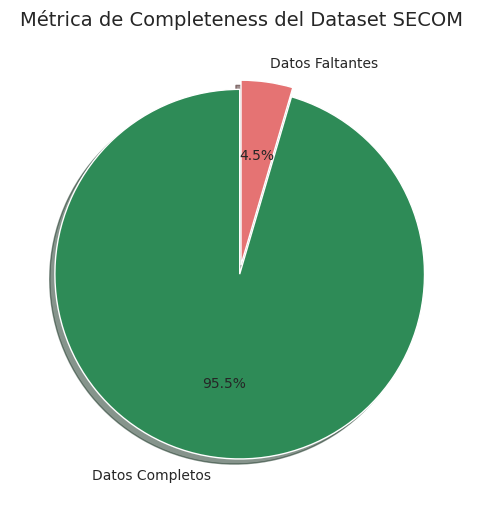

In [70]:
# Calcular totales
total_values = df.size
non_missing_values = df.notna().sum().sum()
missing_values = df.isna().sum().sum()

# Calcular métricas
completeness = (non_missing_values / total_values) * 100
missing_pct = 100 - completeness

# Mostrar resultados numéricos
print(f"Total de valores: {total_values:,}")
print(f"Valores no nulos: {non_missing_values:,}")
print(f"Valores faltantes: {missing_values:,}")
print(f"\nMétrica de Completeness: {completeness:.2f}%")

# Datos para el gráfico
data = [completeness, missing_pct]
labels = ['Datos Completos', 'Datos Faltantes']

# Crear gráfico de pastel
plt.figure(figsize=(6,6))
colors = ['#2E8B57', '#E57373']  # verde = completo, rojo = faltante
explode = (0.05, 0)  # separar ligeramente el primer segmento

plt.pie(
    data,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title('Métrica de Completeness del Dataset SECOM', fontsize=14)
plt.show()


**Observaciones:**


Este resultado indica que, en términos generales, la integridad del conjunto de datos es adecuada para realizar análisis descriptivo y exploratorio. Sin embargo, el 4.52% de datos faltantes no debe pasarse por alto, ya que podría concentrarse en variables específicas que representen sensores o etapas críticas del proceso productivo.

En el contexto de la manufactura de semiconductores, los valores faltantes pueden estar relacionados con:

- Fallos temporales de sensores o equipos de medición.

- Condiciones de operación en las que ciertas variables no se registran.

- Registros incompletos durante mantenimiento o pruebas experimentales.

**Evaluación de Valores faltantes**

Nos adentraremos a un problema muy común en las bases de datos, los valores faltantes. Para ello realizaremos un cálculo del porcentaje de valores faltantes para cada columna en el Dataframe "df". Seguido utilizaremos un gráfico de barras para vizualizar el top 15 columnas con mayor cantidad de valores faltantes.

/tmp/ipython-input-1084398209.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


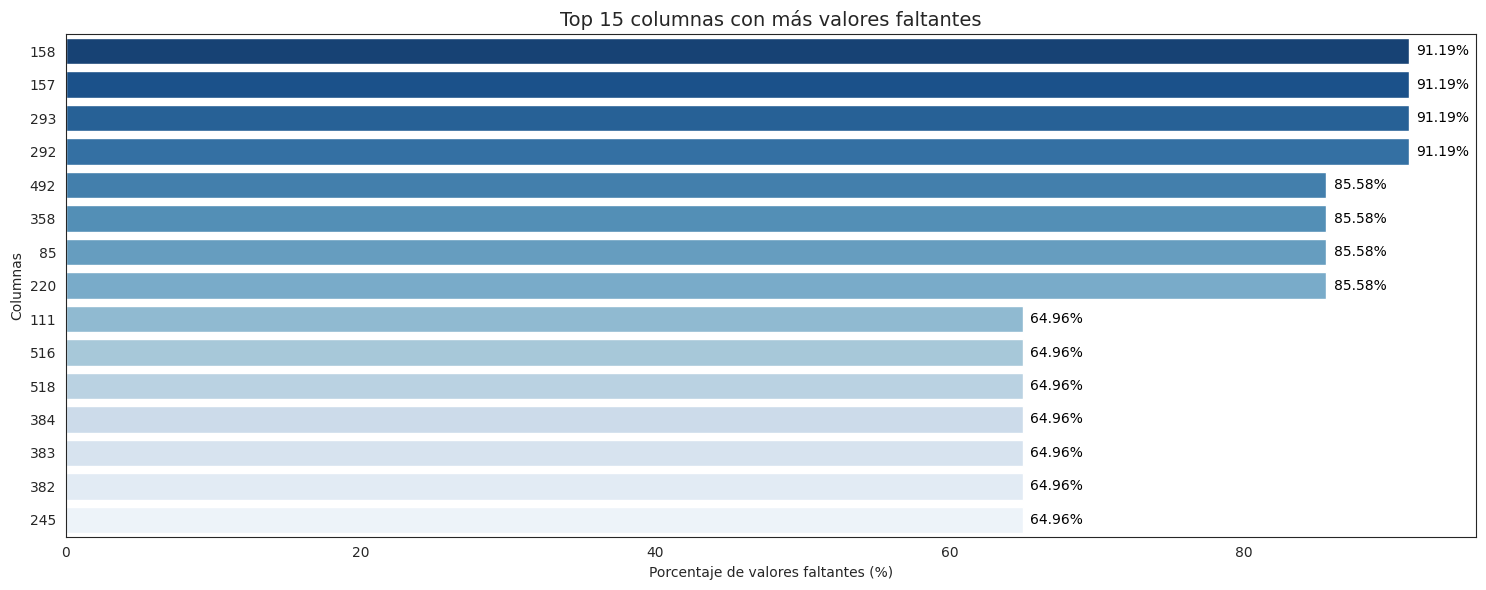

In [71]:
# VALORES FALTANTES
# Porcentaje de valores faltantes por cada columna
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "missing_pct": df.isna().mean() * 100
})

# Ordenar columnas por mayor porcentaje de faltantes
missing_sorted = summary.sort_values("missing_pct", ascending=False).head(15)

# Generar gráfico de barras
plt.figure(figsize=(15,6))
ax = sns.barplot(
    y=missing_sorted.index.astype(str),
    x=missing_sorted["missing_pct"],
    palette="Blues_r"
)

# Título y etiquetas
plt.title("Top 15 columnas con más valores faltantes", fontsize=14)
plt.xlabel("Porcentaje de valores faltantes (%)")
plt.ylabel("Columnas")

# Añadir etiquetas de porcentaje en cada barra
for i, v in enumerate(missing_sorted["missing_pct"]):
    ax.text(v + 0.5, i, f"{v:.2f}%", color='black', va='center')

plt.tight_layout()
plt.show()

**Observaciones**

El gráfico de barras demuestra que el Top 15 variables del proceso las cuales tienen valores faltantes esta por arriba del 64.96%.

Las columnas con mayor porcentaje de valores faltantes serán consideradas en el análisis descriptivo de los datos, con el propósito de evaluar si existe una relación entre la presencia de valores ausentes y la ocurrencia de defectos. En otras palabras, se buscará responder si los productos que fallan presentan más valores faltantes en ciertas variables que aquellos que pasan, lo cual podría indicar comportamientos anómalos en sensores o procesos específicos dentro de la línea de manufactura.

**Evaluación de Duplicados**

Revisar registros duplicados es esencial para asegurar que los datos representen correctamente la realidad del proceso. Si existen muchas filas repetidas, los resultados del análisis pueden estar sesgados, ya que se daría más peso a información redundante que no aporta valor.

/tmp/ipython-input-3674065545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


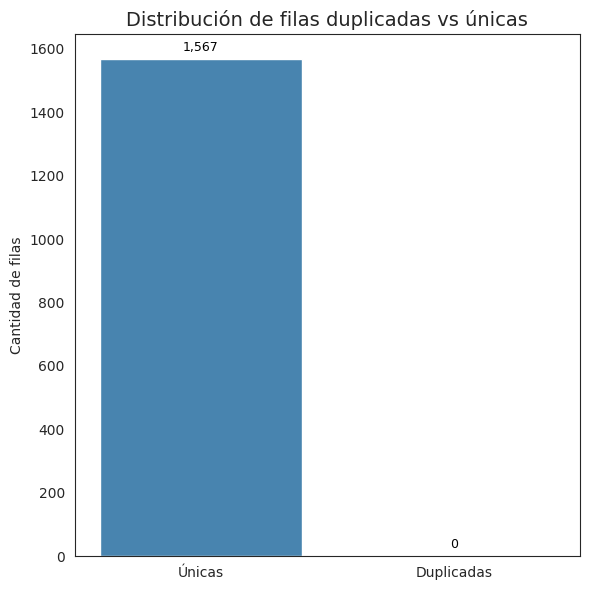

In [73]:
# Detectar filas duplicadas.
duplicates_all = df[df.duplicated(keep=False)]

# Detectar fechas duplicadas.
duplicates_datetime = df[df["datetime"].duplicated(keep=False)]

# Contar filas únicas y duplicadas
duplicados_count = pd.Series({
    "Únicas": len(df) - len(duplicates_all),
    "Duplicadas": len(duplicates_all)
})

# Crear gráfico
plt.figure(figsize=(6,6))
ax = sns.barplot(
    x=duplicados_count.index,
    y=duplicados_count.values,
    palette="Blues_r"
)

# Título y etiquetas
plt.title("Distribución de filas duplicadas vs únicas", fontsize=14)
plt.ylabel("Cantidad de filas")
plt.xlabel("")

# Agregar los valores numéricos sobre cada barra
for i, v in enumerate(duplicados_count.values):
    ax.text(i, v + (max(duplicados_count.values) * 0.01),  # posición un poco arriba de la barra
            f"{int(v):,}",  # formato con separador de miles
            ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

**Observaciones**

Se observa que no existen filas idénticas, lo que implica que no hay dos muestras del proceso de manufactura con las mismas mediciones/variables. Se opto por omitir la busqueda de duplicidades parciales, ya que la naturaleza del proceso de manufactura es que las piezas producidas tiendan siempre en un mismo rango, para asegurar su calidad. Es por ello que se espera que exista duplicidad parcial.

**Tipos de datos**

Identificar los tipos de datos de cada columna en el dataset ayuda a comprender cómo está estructurado el dataset y qué transformaciones son necesarias. Por ejemplo, algunas variables pueden ser numéricas continuas, otras categóricas o de tiempo, y cada una requiere un tratamiento distinto en las fases de preprocesamiento y modelado.

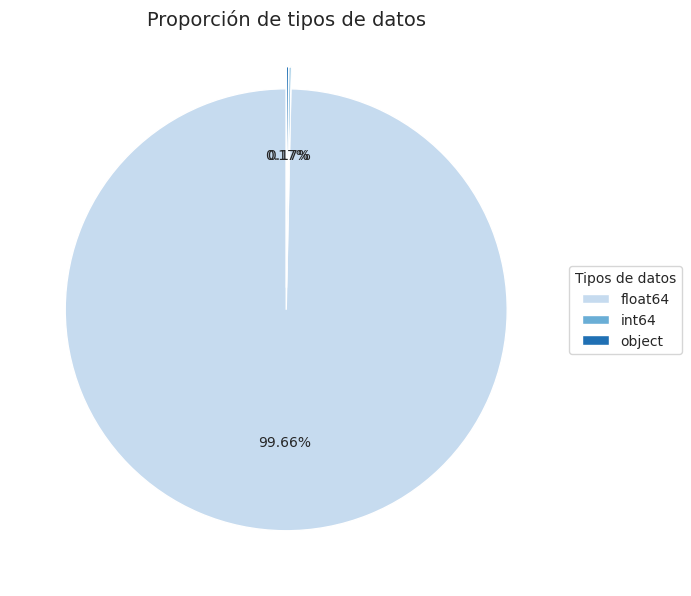

In [74]:
# Contar por tipo
tipo_datos = pd.Series([str(v) for v in df.dtypes]).value_counts()

# Definir explosión (resalta las categorías pequeñas)
explode = [0.1 if v < tipo_datos.max() else 0 for v in tipo_datos.values]

# Crear Diagrama de Pie
plt.figure(figsize=(7,7))
plt.pie(
    tipo_datos.values,
    autopct='%1.2f%%',
    startangle=90,
    explode=explode,
    colors=sns.color_palette("Blues", len(tipo_datos))
)

# Título y etiquetas
plt.title("Proporción de tipos de datos", fontsize=14)
plt.legend(tipo_datos.index, title="Tipos de datos", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


**Observaciones**

Se observa que la gran mayoria de los datos son de tipo Float64, el cual nos permite trabajar con datos numéricos con decimales. Por otra parte se obserba que el 0.17% de los datos es de tipo int64, lo que permite trabajar con datos numéricos enteros. Por último, el 0.17% de os datos es de tipo object, dicha variable tendra que ser analiazda para comprender que a que tipo de dato debera ser actualizada.

Anteriormente se analizó que se cuentan con 591 variables, por lo que el 0.17% corresponde a 1 variable. Además, se clarifico que en la columna "datetime" del dataframe se tiene el registro de la fecha para cada muestra del proceso productivo. A su vez, se explico que el la columna "labels" del dataframe se encuentran registrados los datos binomiales que corresponden a 1 y -1, siendo -1 un producto aprobado y 1 un producto defectuoso.

**Investigación Tipo de Datos**

Dado que el conjunto de datos está compuesto principalmente por variables numéricas, se identificó que solo una columna es de tipo object y otra de tipo int64.

A continuación, se investigará qué columnas corresponden a estos tipos de datos para determinar si requieren una conversión o ajuste antes de continuar con el preprocesamiento.

In [76]:
# Filtrar columnas por tipo de dato
object_columns = df.select_dtypes(include=['object']).columns.tolist()
int_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Mostrar resultados
print("Columnas de tipo 'object':", object_columns)
print("Columnas de tipo 'int64':", int_columns)

# Visualización opcional: resumen en tabla
data_types_summary = pd.DataFrame({
    'Tipo de Dato': ['object', 'int64'],
    'Número de Columnas': [len(object_columns), len(int_columns)],
    'Columnas Identificadas': [object_columns, int_columns]
})

display(data_types_summary)

Columnas de tipo 'object': ['datetime']
Columnas de tipo 'int64': ['label']


,Tipo de Dato,Número de Columnas,Columnas Identificadas
0,object,1,[datetime]
1,int64,1,[label]


**Observaciones**

Los resultados obtenidos servirán como base para el preprocesamiento de los datos, donde se realizarán los ajustes necesarios en los tipos de variables. En particular, la columna datetime, actualmente definida como tipo object, será transformada a un formato de fecha y hora para facilitar su análisis temporal. Por otro lado, la columna label, de tipo integer, será evaluada para modificar su representación a valores más interpretables como “Pass” y “Fail”, evitando así posibles confusiones o errores lógicos en etapas posteriores del análisis.

# **6) Preprocesamiento de los datos**

**Conversión de tipo de datos en la columna datetime.**

Convertir la columna datetime a un formato de fecha y hora permite trabajar con la información temporal de manera correcta. Esto facilita análisis posteriores como agrupar por día, mes o año, y entender mejor la evolución de los defectos en el tiempo.


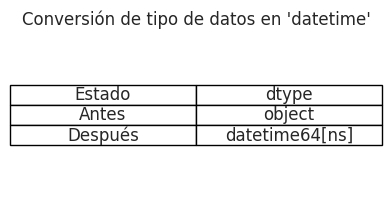

In [77]:
# CONVERSIÓN DE DATETIME (Antes vs Después)
dtype_before = "object"
dtype_after = str(df["datetime"].astype('datetime64[ns]').dtype)

tabla_datetime = pd.DataFrame({
    "Estado": ["Antes", "Después"],
    "dtype": [dtype_before, dtype_after]
})

# Mostrar tabla como gráfico de texto
fig, ax = plt.subplots(figsize=(4,2))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=tabla_datetime.values,
                 colLabels=tabla_datetime.columns,
                 cellLoc='center',
                 loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)
plt.title("Conversión de tipo de datos en 'datetime'", fontsize=12, pad=10)
plt.show()

**Normalizar columnas para el dataframe features**

Al cambiar los nombres de las columnas de números simples a un formato estándar como f001, f002, ..., el dataset se vuelve más ordenado y fácil de interpretar. Esto permite mejorar la legibilidad del conjunto de datos y representar de forma más precisa las mediciones del proceso de manufactura, donde cada variable corresponde a un sensor o parámetro específico del sistema de producción.

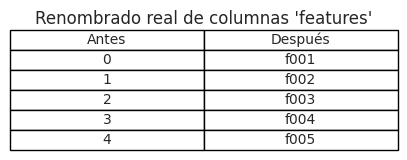

In [79]:
# NORMALIZAR COLUMNAS FEATURES

# Renombrar columnas de features con el formato f001, f002, f003...
feature_cols = [f"f{str(i+1).zfill(3)}" for i in range(df.shape[1] - 2)]  # restar label y datetime
df.columns = ['label', 'datetime'] + feature_cols

# Mostrar tabla ilustrativa de cómo se renombraron
antes = list(range(5))
despues = feature_cols[:5]

tabla_features = pd.DataFrame({
    "Antes": antes,
    "Después": despues
})

fig, ax = plt.subplots(figsize=(5,1.5))
ax.axis("off")
tabla = ax.table(cellText=tabla_features.values,
                 colLabels=tabla_features.columns,
                 cellLoc='center',
                 loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1,1.2)
ax.set_title("Renombrado real de columnas 'features'", fontsize=12)
plt.show()

**Normalizar la columna Target (label)**

Transformar la columna objetivo de valores -1 y 1 a etiquetas más claras como Pass y Fail hace que los resultados sean más fáciles de interpretar. De esta manera, cualquier gráfico o análisis posterior muestra directamente si la pieza pasó o falló sin necesidad de recordar qué número significa qué.

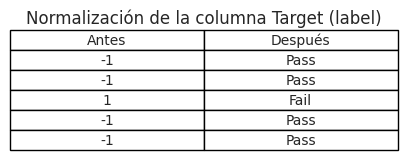

In [80]:
# NORMALIZAR COLUMNA TARGET (label)
antes_target = df["label"].head(5).tolist()
despues_target = ["Fail" if x == 1 else "Pass" for x in antes_target]

tabla_target = pd.DataFrame({
    "Antes": antes_target,
    "Después": despues_target
})

fig, ax = plt.subplots(figsize=(5,1.5))
ax.axis("off")
tabla = ax.table(cellText=tabla_target.values,
                 colLabels=tabla_target.columns,
                 cellLoc='center',
                 loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1,1.2)
ax.set_title("Normalización de la columna Target (label)", fontsize=12)
plt.show()

## 5) Análisis descriptivo de los datos


**¿Qué porcentaje de la producción corresponde a fallas en diferentes meses, semanas y días (tendencia mensual, semanal y diaria)?**

Analizar la tasa de fallos a nivel mensual, semanal y diario permite identificar patrones y posibles estacionalidades en los defectos de producción.
Esto puede relacionarse con cambios en la demanda, lotes de materiales, mantenimientos de equipos o factores externos. Conocer estas variaciones ayuda a planificar recursos, priorizar inspecciones y tomar decisiones preventivas antes de los periodos más críticos

/tmp/ipython-input-2375040725.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


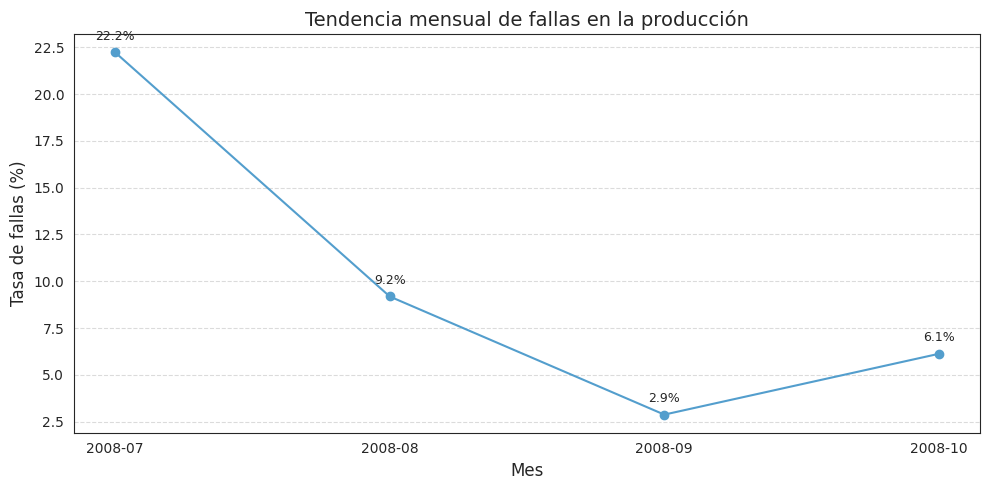

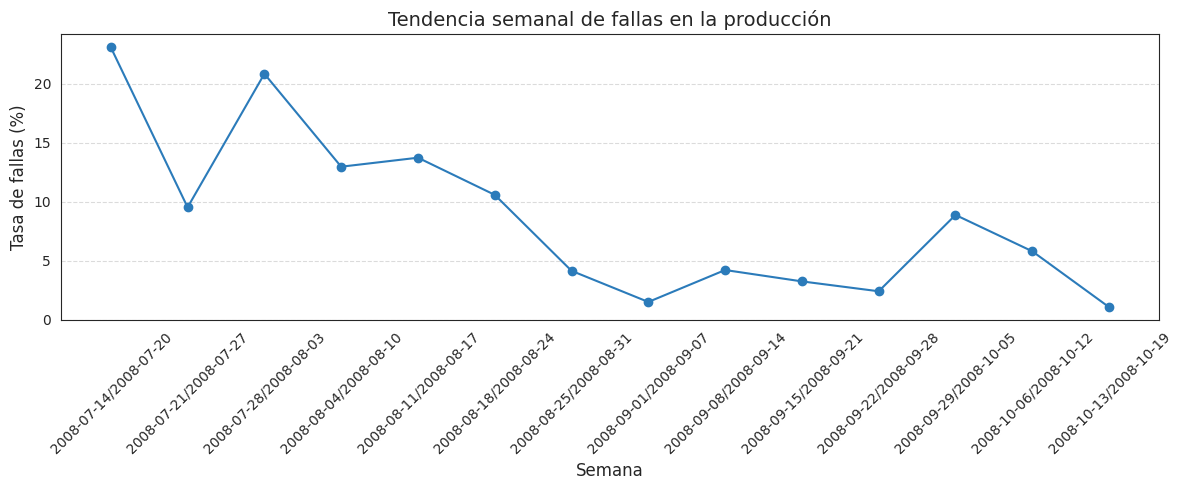

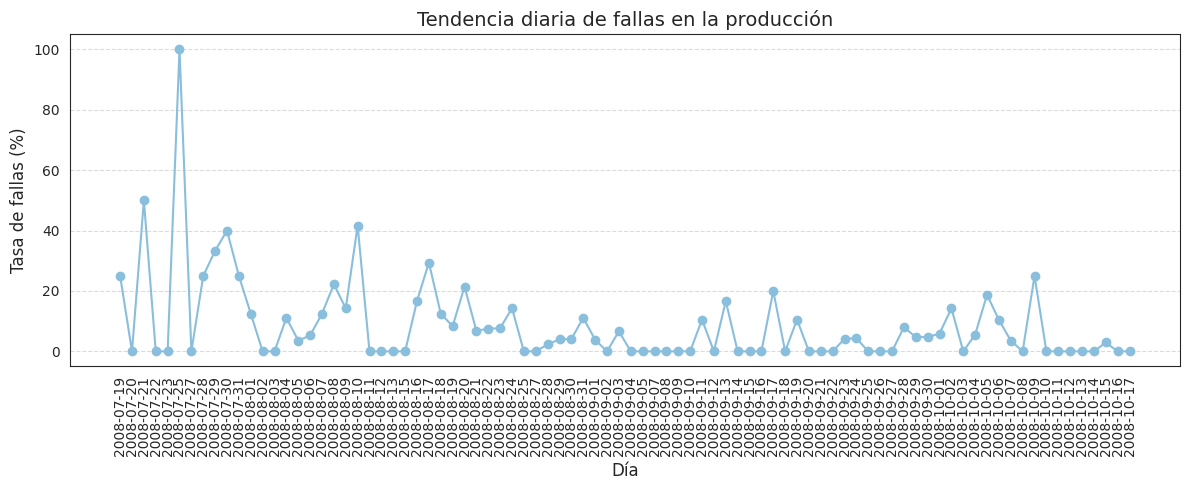

In [81]:
# Estilo: fondo blanco y paleta de azules
sns.set_style("white")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
pal = sns.color_palette("Blues", 6)  # paleta de azules (usar distintas posiciones para consistencia)

# 1) Asegurarse de que 'datetime' sea datetime.
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Crear columna auxiliar 'is_fail' para simplificar cálculos
df['is_fail'] = df['label'].apply(lambda x: 1 if x == 1 else 0)

# 1) Tendencia Mensual
df['year_month'] = df['datetime'].dt.to_period('M')
monthly = df.groupby('year_month').agg(
    produccion_total=('label', 'size'),
    defectos_totales=('is_fail', 'sum')
)
monthly['tasa_fallas'] = (monthly['defectos_totales'] / monthly['produccion_total']) * 100

# Gráfico mensual
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly.index.astype(str), monthly['tasa_fallas'], marker='o', linestyle='-', color=pal[3])
ax.set_ylabel('Tasa de fallas (%)', fontsize=12)
ax.set_xlabel('Mes', fontsize=12)
ax.set_title('Tendencia mensual de fallas en la producción', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(monthly['tasa_fallas']):
    ax.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# 2) Tendencia Semanal
df['year_week'] = df['datetime'].dt.to_period('W')
weekly = df.groupby('year_week').agg(
    produccion_total=('label', 'size'),
    defectos_totales=('is_fail', 'sum')
)
weekly['tasa_fallas'] = (weekly['defectos_totales'] / weekly['produccion_total']) * 100

# Gráfico semanal
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(weekly.index.astype(str), weekly['tasa_fallas'], marker='o', linestyle='-', color=pal[4])
ax.set_ylabel('Tasa de fallas (%)', fontsize=12)
ax.set_xlabel('Semana', fontsize=12)
ax.set_title('Tendencia semanal de fallas en la producción', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Tendencia Diaria
df['date'] = df['datetime'].dt.date
daily = df.groupby('date').agg(
    produccion_total=('label', 'size'),
    defectos_totales=('is_fail', 'sum')
)
daily['tasa_fallas'] = (daily['defectos_totales'] / daily['produccion_total']) * 100

# Gráfico diario
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(daily.index.astype(str), daily['tasa_fallas'], marker='o', linestyle='-', color=pal[2])
ax.set_ylabel('Tasa de fallas (%)', fontsize=12)
ax.set_xlabel('Día', fontsize=12)
ax.set_title('Tendencia diaria de fallas en la producción', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observaciones**

Análisis de la Dinámica de Fallas en la Producción de Semiconductores
El estudio de la tendencia de fallas en la producción, analizada en sus dimensiones mensual, semanal y diaria, muestra un avance notable en el control del proceso, aunque aún se enfrenta a una volatilidad considerable. A nivel mensual, presenciamos una reducción drástica en la tasa promedio de defectos, cayendo de un 22.2% en julio a un excelente mínimo de 2.9% en septiembre. Esta mejoría evidencia que las medidas correctivas implementadas durante el trimestre han sido efectivas. Sin embargo, el ligero repunte al 6.1% en octubre nos recuerda que el esfuerzo de optimización debe ser continuo y sostenido.

La revisión de las tendencias semanales y diarias nos permite entender la naturaleza real de estas fallas. Mientras la tendencia semanal reafirma la disminución general de la tasa, la gráfica diaria es la clave: muestra que el proceso está marcado por picos de falla aislados y extremadamente altos, llegando algunos a impactar el 100% de la producción en un día, intercalados con muchos días de cero defectos. Esto sugiere que la inestabilidad no proviene de una debilidad crónica y constante, sino de una vulnerabilidad a eventos catastróficos muy puntuales. Por ello, el foco de la investigación futura debe ser el análisis riguroso de estos eventos de fallo esporádicos y de alto impacto para identificar y neutralizar sus causas raíz, asegurando así una verdadera estabilidad operativa.

**¿Existen días de la semana donde la tasa de fallos es significativamente mayor?**

La evidencia de picos de falla esporádicos y de alto impacto en la tendencia diaria sugiere que las causas de los defectos no son constantes, sino que pueden estar vinculadas a factores que varían con el tiempo, como cambios de turno, procedimientos de inicio/fin de semana, o el mantenimiento programado. Por lo tanto, el siguiente paso crítico en la investigación es desagregar la tasa de fallas diaria por día de la semana (lunes a domingo). Este análisis revelará si existe una tendencia sistemática donde ciertos días, como el inicio o el final de la semana laboral, presentan consistentemente una mayor o menor propensión a la generación de defectos.

             produccion_total  defectos_totales  tasa_fallas
day_of_week                                                 
Monday                    243                17     6.995885
Tuesday                   253                11     4.347826
Wednesday                 190                14     7.368421
Thursday                  236                15     6.355932
Friday                    242                13     5.371901
Saturday                  204                13     6.372549
Sunday                    199                21    10.552764


/tmp/ipython-input-2518273534.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_stats.index, y=day_stats['tasa_fallas'], palette='Blues')


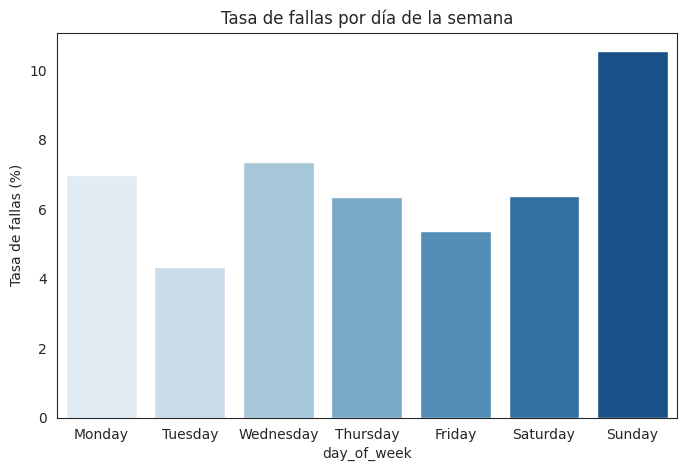

In [82]:
# Crear columna día de la semana
df['day_of_week'] = df['datetime'].dt.day_name()

# Agrupar por día y calcular tasa de fallas
day_stats = df.groupby('day_of_week').agg(
    produccion_total=('label', 'size'),
    defectos_totales=('label', lambda x: (x==1).sum())
)
day_stats['tasa_fallas'] = (day_stats['defectos_totales'] / day_stats['produccion_total']) * 100

# Ordenar días de lunes a domingo
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = day_stats.reindex(dias_orden)

# Mostrar resultados
print(day_stats)

# Gráfico de barras de tasa de fallas
plt.figure(figsize=(8,5))
sns.barplot(x=day_stats.index, y=day_stats['tasa_fallas'], palette='Blues')
plt.ylabel('Tasa de fallas (%)')
plt.title('Tasa de fallas por día de la semana')
plt.show()

**Observaciones**


Observando la tasa de fallas por día de la semana, se revela una marcada disparidad en el desempeño de la producción, lo cual confirma la sospecha de una dependencia temporal en la generación de defectos. Notamos que los días con mayor producción total, como Monday (243) y Tuesday (253), no necesariamente presentan la tasa de fallas más alta, siendo Tuesday el día más eficiente con solo un 4.35% de defectos. En contraste, el Wednesday tiene la producción más baja (190), pero una tasa de fallas alta del 7.37%. Esto indica que la variación no se explica simplemente por un mayor volumen de trabajo. La atención se debe centrar en el domingo, que a pesar de tener una producción total baja (199), registra el número más alto de defectos (21), culminando en una tasa de fallas alarmante del 10.55%. Esta tendencia sugiere que el final de la semana es el periodo más vulnerable del proceso de manufactura, posiblemente debido a una reducción en la supervisión, cambios en el personal, o una menor dedicación al mantenimiento preventivo, lo que se traduce en un riesgo significativamente mayor de producir defectos.

**¿Los productos que fallan tienen más valores faltantes en ciertas columnas que los productos que pasan?**

Para evaluar si los valores faltantes tienen relación con la ocurrencia de defectos, se analizaron las columnas con más del 50% de datos ausentes.
Se construyó un mapa de calor (heatmap) donde se muestra la correlación entre la presencia de valores faltantes y la variable de fallo (Fail).
Este análisis permite identificar si la ausencia de datos en ciertos sensores o mediciones del proceso podría estar asociada a la generación de defectos, ofreciendo una visión inicial sobre posibles variables críticas o problemáticas en la captura de información.


Columnas seleccionadas (más del 50% de valores faltantes): 28
['f073', 'f074', 'f086', 'f110', 'f111', 'f112', 'f158', 'f159', 'f221', 'f245'] ...


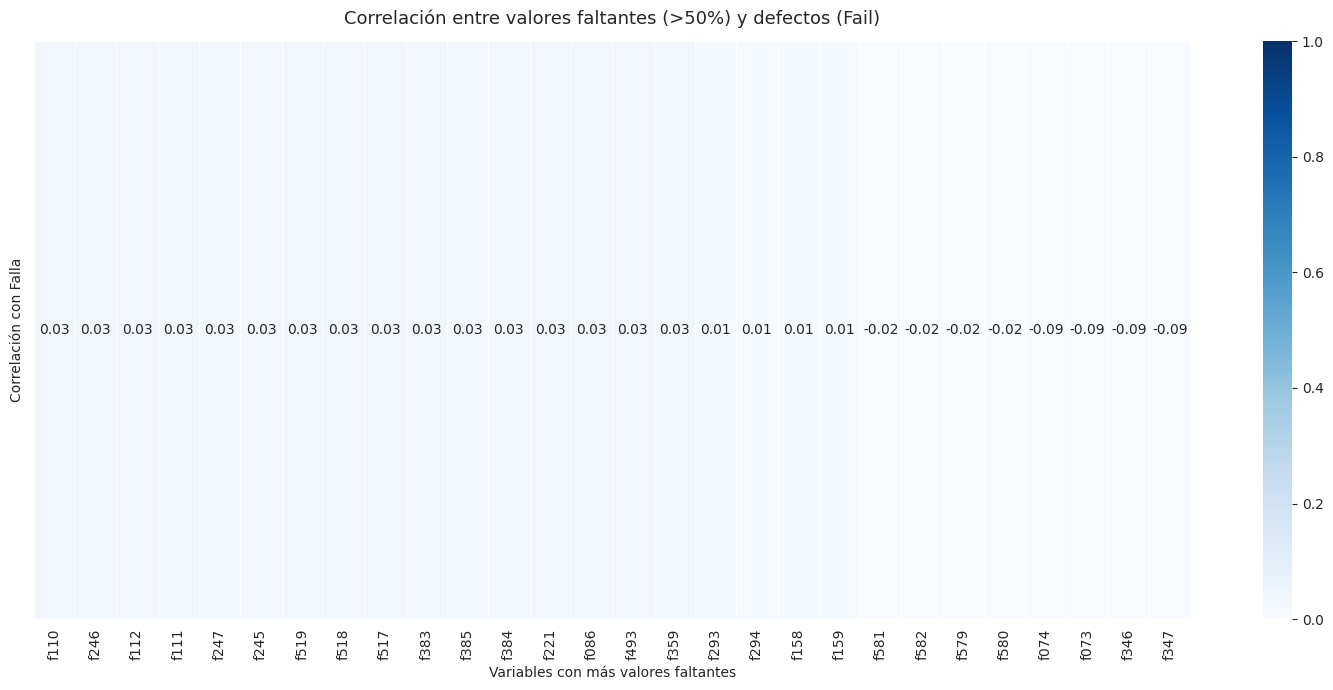

,Correlación con Falla
f110,0.034588
f246,0.034588
f112,0.034588
f111,0.034588
f247,0.034588
f245,0.034588
f519,0.034588
f518,0.034588
f517,0.034588
f383,0.034588


In [83]:
# 1) Calcular el porcentaje de valores faltantes por columna
missing_pct = df.isna().mean() * 100

# 2) Seleccionar columnas con más del 50% de valores faltantes
cols_missing_50 = missing_pct[missing_pct > 50].index.tolist()

print(f"Columnas seleccionadas (más del 50% de valores faltantes): {len(cols_missing_50)}")
print(cols_missing_50[:10], "...")  # mostrar solo las primeras 10

# 3) Crear un nuevo DataFrame indicando si hay valor faltante (1) o no (0)
missing_binary = df[cols_missing_50].isna().astype(int)

# 4) Agregar la columna de fallas 'is_fail' para calcular correlación
missing_binary['is_fail'] = df['is_fail']

# 5) Calcular la correlación
corr_matrix = missing_binary.corr()['is_fail'].drop('is_fail').sort_values(ascending=False)

# 6) Convertir a DataFrame para graficar
corr_df = corr_matrix.to_frame().rename(columns={'is_fail': 'Correlación con Falla'})

# 7) Mostrar como heatmap
plt.figure(figsize=(15, max(6, len(corr_df)*0.25)))
sns.heatmap(
    corr_df.T,
    annot=True,
    cmap='Blues',
    vmin=0, vmax=1,
    cbar=True,
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlación entre valores faltantes (>50%) y defectos (Fail)", fontsize=13, pad=12)
plt.xlabel("Variables con más valores faltantes")
plt.ylabel("")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 8) Mostrar las 10 variables con mayor correlación
top_corr = corr_df.sort_values(by='Correlación con Falla', ascending=False).head(10)
display(top_corr)

**Observaciones**

El análisis de correlación mediante el mapa de calor no sugiere una relación significativa entre la presencia de valores faltantes y la variable objetivo (fallo o aprobación del producto). Por lo tanto, se asume que los datos faltantes se distribuyen aleatoriamente (MCAR), lo que permite su imputación sin introducir sesgo en el análisis posterior.

**Imputacion de Valores Faltantes en variables con + 50% de Valores faltantes.**

Antes de proceder a la imputación de los valores faltantes, se realiza un análisis visual de las variables críticas mediante boxplots.
Se seleccionaron las columnas con más del 50% de datos faltantes, ya que estas representan un riesgo potencial de sesgo si no se manejan adecuadamente.
Los boxplots permiten observar la distribución, mediana y posibles valores atípicos de cada variable, lo que ayuda a decidir la estrategia de imputación más adecuada.
Para optimizar la visualización, los gráficos se presentan en un grid organizado (por ejemplo, 7 filas por 4 columnas), lo que facilita la comparación entre variables y mantiene la claridad para el lector.

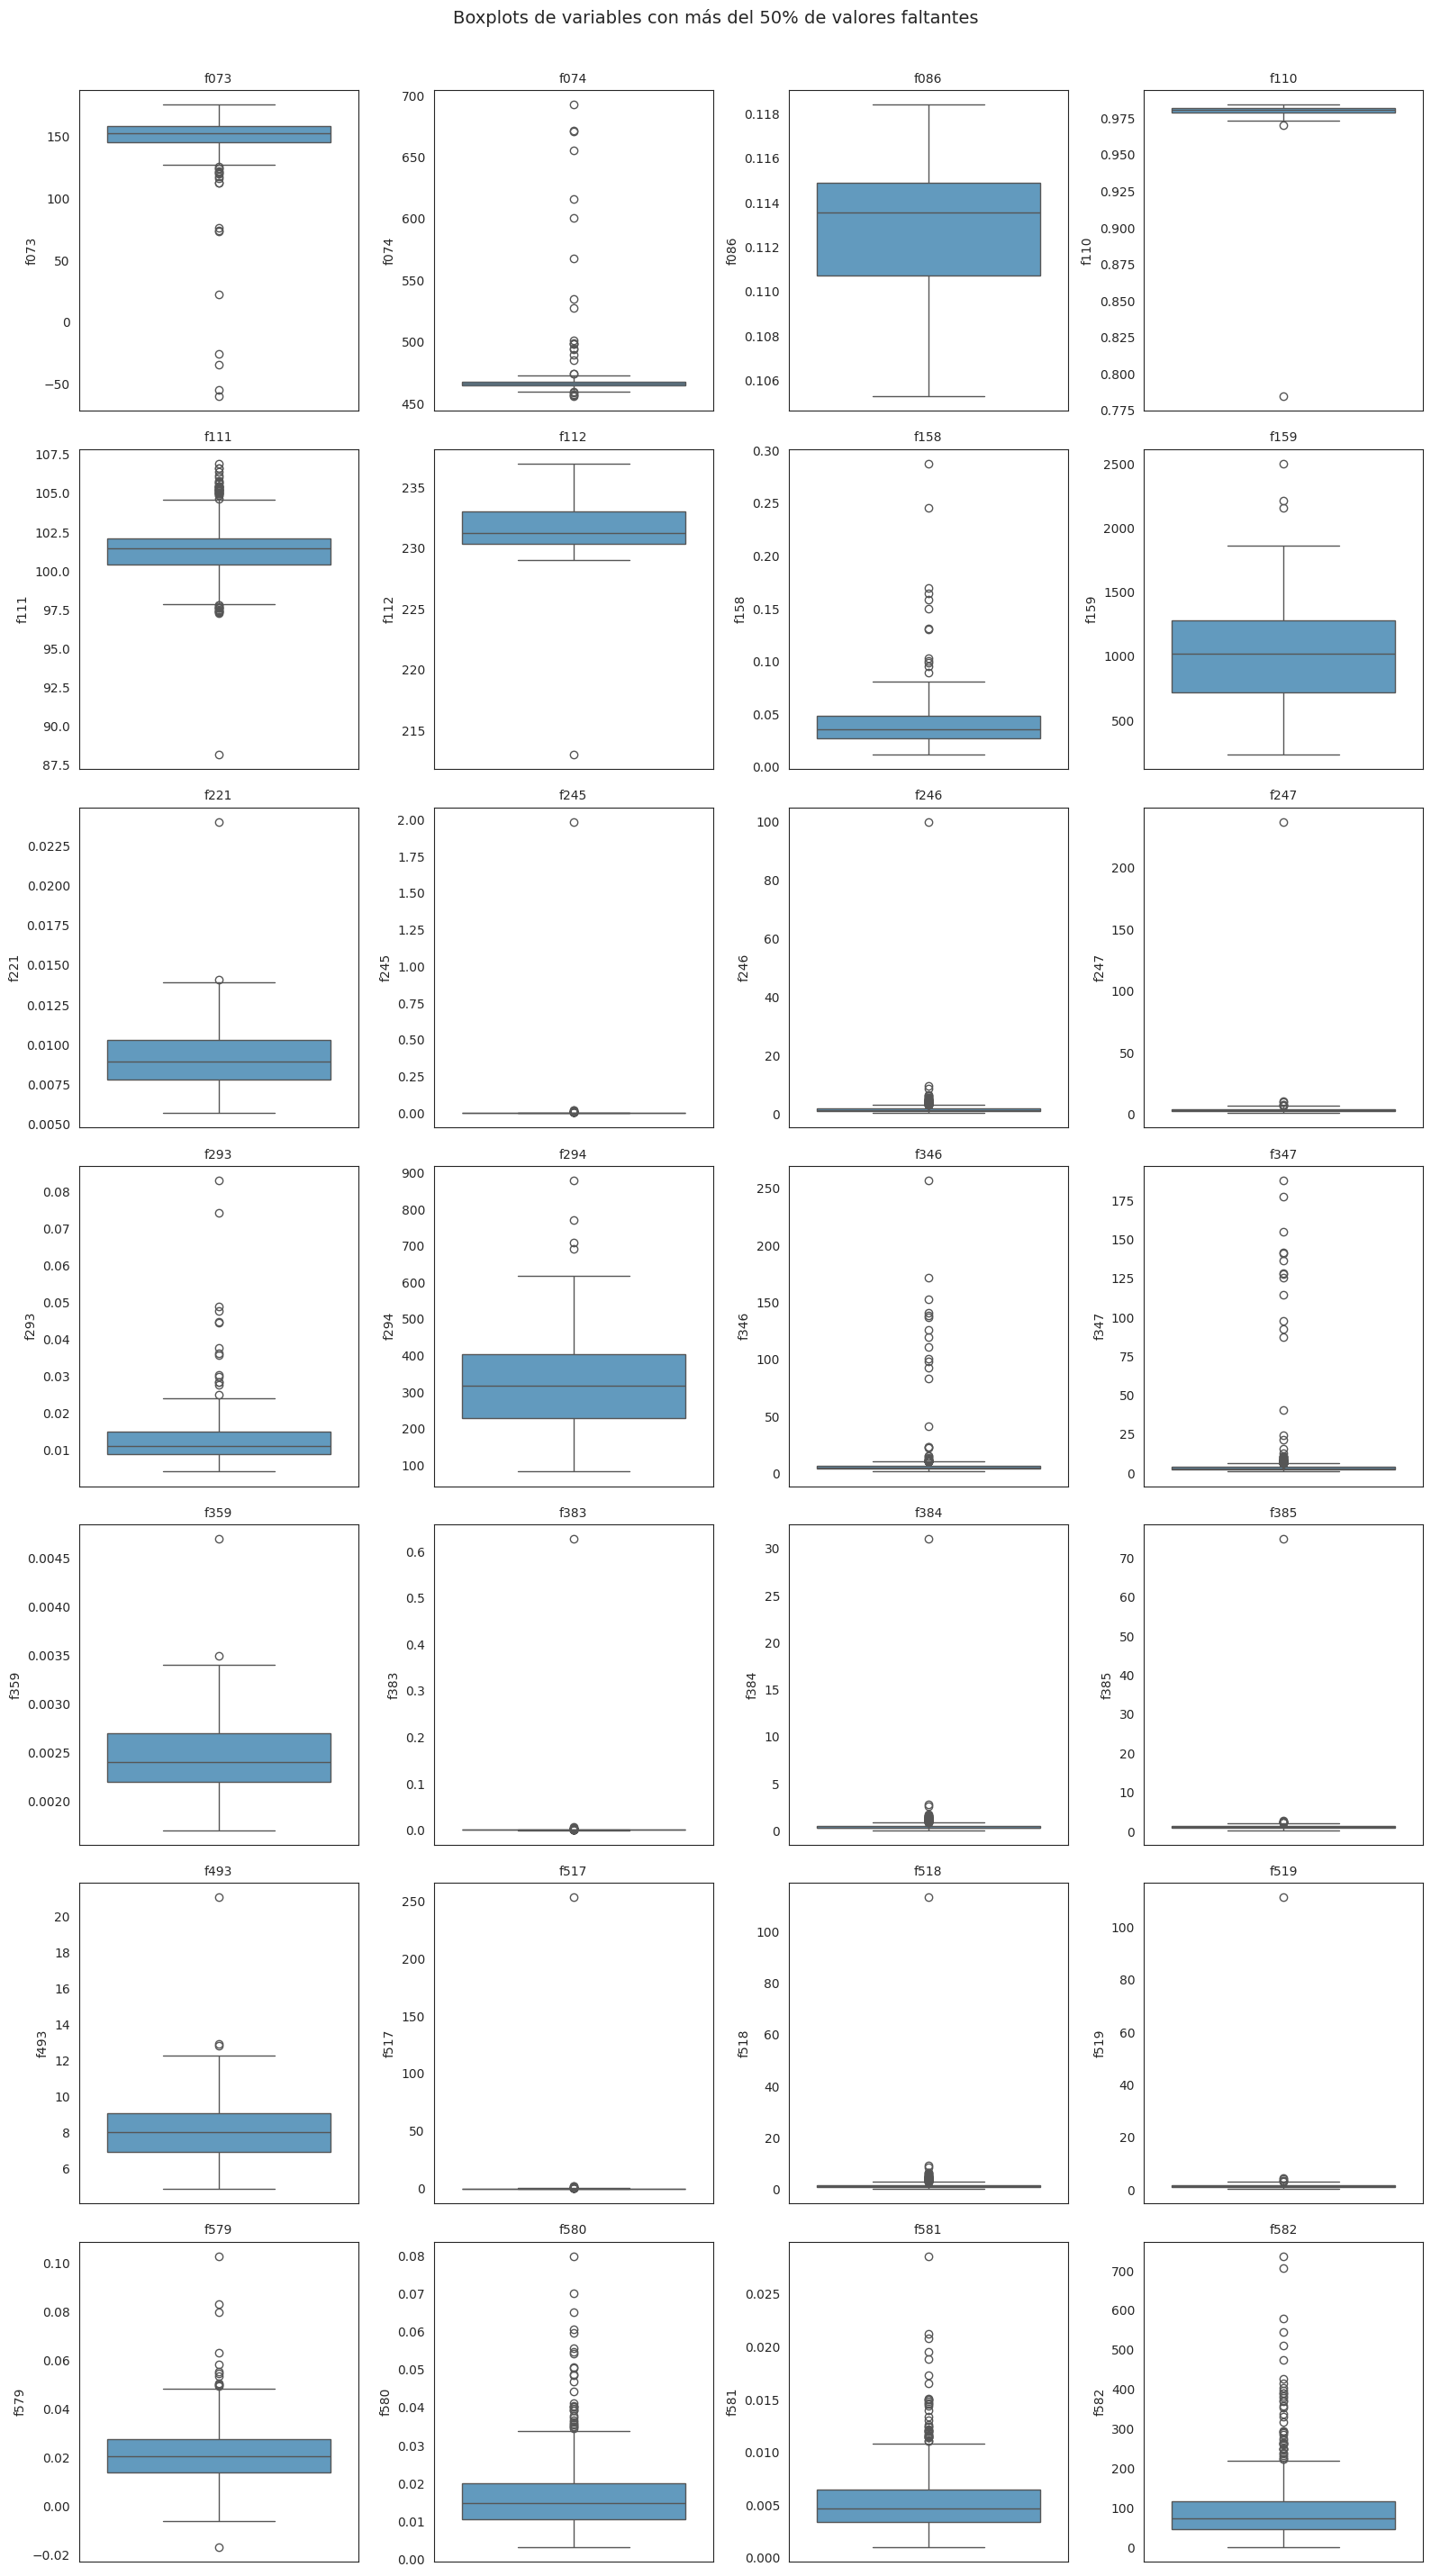

In [66]:
# Seleccionar columnas con más del 50% de valores faltantes
missing_pct = df.isna().mean() * 100
cols_missing_50 = missing_pct[missing_pct > 50].index.tolist()

# Configuración del grid
n_cols = 4  # número de columnas en el grid
n_rows = int(np.ceil(len(cols_missing_50) / n_cols))  # filas necesarias

# Tamaño de la figura
plt.figure(figsize=(n_cols*4, n_rows*4))

# Generar boxplots para cada variable
for i, col in enumerate(cols_missing_50, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color=pal[3])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Boxplots de variables con más del 50% de valores faltantes", fontsize=14, y=1.02)
plt.show()

**Observaciones**

Para la imputación de los valores faltantes en las variables con más del 50% de datos ausentes, se emplean boxplots para visualizar la distribución de cada variable, incluyendo la mediana, rangos y posibles valores atípicos. Esta visualización permite identificar de manera clara el valor central representativo de cada variable, el cual servirá como referencia para imputar los datos faltantes. Al usar la mediana como estrategia de imputación, se reduce el efecto de los valores extremos y se mantiene la integridad de la distribución de los datos, asegurando que la imputación sea robusta y coherente con la tendencia de cada variable.

In [84]:
# Imputar valores faltantes usando la mediana en columnas con >50% de datos faltantes
for col in cols_missing_50:
    median_val = df[col].median()  # Calcular la mediana ignorando NaN
    df[col].fillna(median_val, inplace=True)  # Imputar NaN con la mediana

# Verificar que no queden valores faltantes en estas columnas
missing_after = df[cols_missing_50].isna().sum()
print("Valores faltantes después de la imputación:\n", missing_after)


Valores faltantes después de la imputación:
 f073    0
f074    0
f086    0
f110    0
f111    0
f112    0
f158    0
f159    0
f221    0
f245    0
f246    0
f247    0
f293    0
f294    0
f346    0
f347    0
f359    0
f383    0
f384    0
f385    0
f493    0
f517    0
f518    0
f519    0
f579    0
f580    0
f581    0
f582    0
dtype: int64


/tmp/ipython-input-1334080080.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)  # Imputar NaN con la mediana


**Observaciones**

Una vez completada la imputación de valores faltantes mediante la mediana, todas las columnas con más del 50% de datos ausentes quedaron completas, lo que permite garantizar la consistencia y continuidad en el análisis posterior. Este procedimiento reduce el impacto de los valores atípicos, preservando la distribución natural de los datos. Con las columnas ahora completas, es posible explorar visualmente su comportamiento mediante histogramas, lo que permite observar la distribución de los valores originales frente a los imputados, identificar posibles sesgos y confirmar que la imputación mantiene la integridad de la información. Esta visualización servirá como base para comprender mejor las características de cada variable antes de realizar análisis estadísticos adicionales.

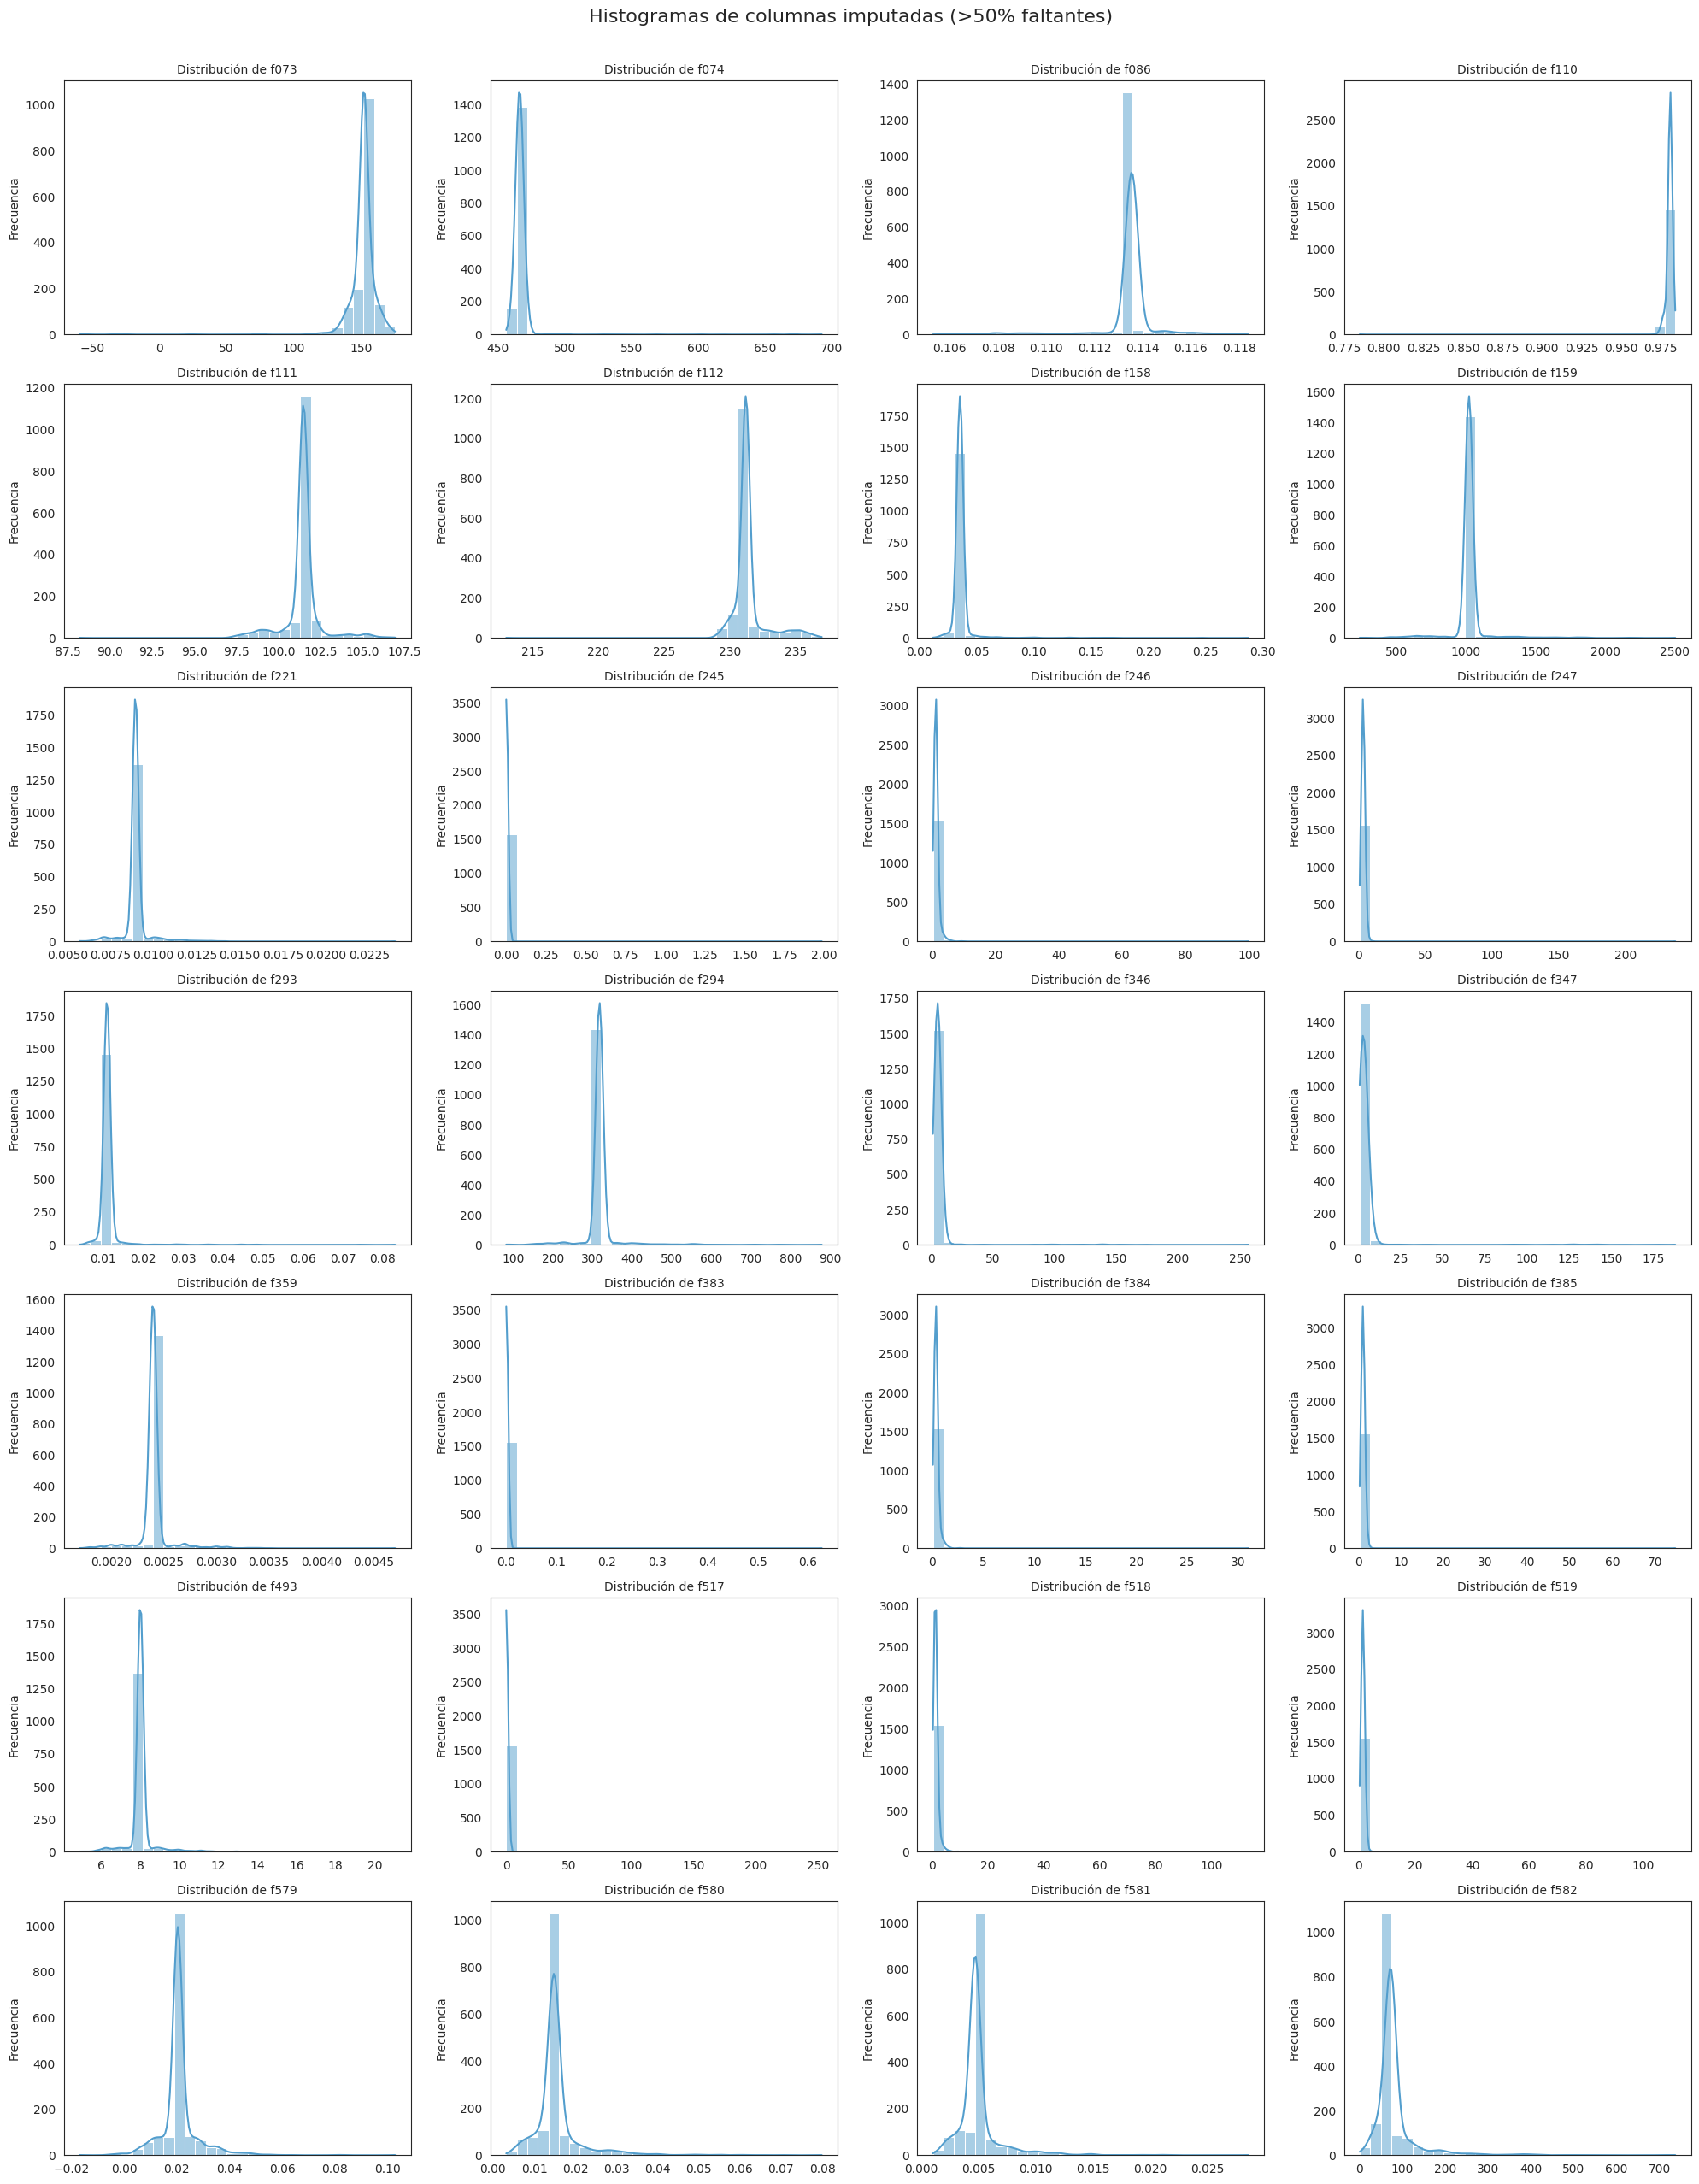

In [85]:
# Configuración del grid: 7 filas x 4 columnas
n_rows, n_cols = 7, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()  # Facilita iterar sobre los axes

# Generar histogramas para cada columna imputada
for i, col in enumerate(cols_missing_50):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color=pal[3])
    axes[i].set_title(f"Distribución de {col}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar subplots vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histogramas de columnas imputadas (>50% faltantes)", fontsize=16, y=1.02)
plt.show()


**Observaciones**

Una vez realizada la imputación de las columnas con más del 50% de valores faltantes, los histogramas generados permiten observar la distribución de los datos para cada variable imputada. En términos generales, se aprecia que la mayoría de las variables presentan distribuciones sesgadas o concentraciones de valores que reflejan la presencia de datos atípicos, lo cual justifica el uso de la mediana para la imputación, asegurando que los valores extremos no distorsionen la representación central de los datos.

# **7) Conclusiones**

En conclusión, el análisis y preprocesamiento de los datos del dataset SECOM permitió identificar y corregir diversos problemas que podrían afectar el rendimiento de un modelo predictivo. Se revisaron valores faltantes, duplicados y tipos de datos, normalizando las columnas de features y la variable target para garantizar consistencia y claridad. Las columnas con más del 50% de valores faltantes fueron imputadas utilizando la mediana, protegiendo la información frente a datos atípicos, y se verificó visualmente su distribución mediante boxplots e histogramas.

Con esta preparación de los datos, los siguientes pasos estarán enfocados en la construcción del modelo predictivo. Esto incluye seleccionar las variables más relevantes que puedan influir en la probabilidad de que un producto falle o pase, evaluar técnicas de reducción de dimensionalidad si es necesario, y finalmente entrenar y validar modelos de clasificación que permitan predecir la calidad de los productos con precisión.

